In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Functions_Vincent import *
from functions import *

from sklearn import preprocessing

pd.options.display.max_columns = 70
pd.options.display.max_rows = 100
pd.set_option('display.width', 1000)

from matplotlib import style
#style.use('dark_background')
style.use('default')

In [2]:
# lets watch column names, types and usable rates
Df_category_name = pd.read_csv('product_category_name_translation.csv').drop_duplicates()
print('Df_category_name')
print(Df_category_name.columns.values)
info_data_unique(Df_category_name)
print(' ')
#for cat_en, cat_port in zip(Df_category_name.product_category_name_english,Df_category_name.product_category_name) :
#    print(cat_en,"---",cat_port)

Df_category_name
['product_category_name' 'product_category_name_english']
les colonnes sont de types :   [dtype('O')]
  
il y a : 71 lignes, 2 colonnes
  
il y a : 100.0 % de valeurs utilisables
 


In [3]:
# lets watch column names, types and usable rates
Df_sellers = pd.read_csv('olist_sellers_dataset.csv').drop_duplicates()
print('Df_sellers')
print(Df_sellers.columns.values)
info_data_unique(Df_sellers)
Df_sellers.nunique()

Df_sellers
['seller_id' 'seller_zip_code_prefix' 'seller_city' 'seller_state']
les colonnes sont de types :   [dtype('O') dtype('int64')]
  
il y a : 3095 lignes, 4 colonnes
  
il y a : 100.0 % de valeurs utilisables


seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

Df_products
['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']
les colonnes sont de types :   [dtype('O') dtype('float64')]
  
il y a : 32951 lignes, 9 colonnes
  
il y a : 99.2 % de valeurs utilisables


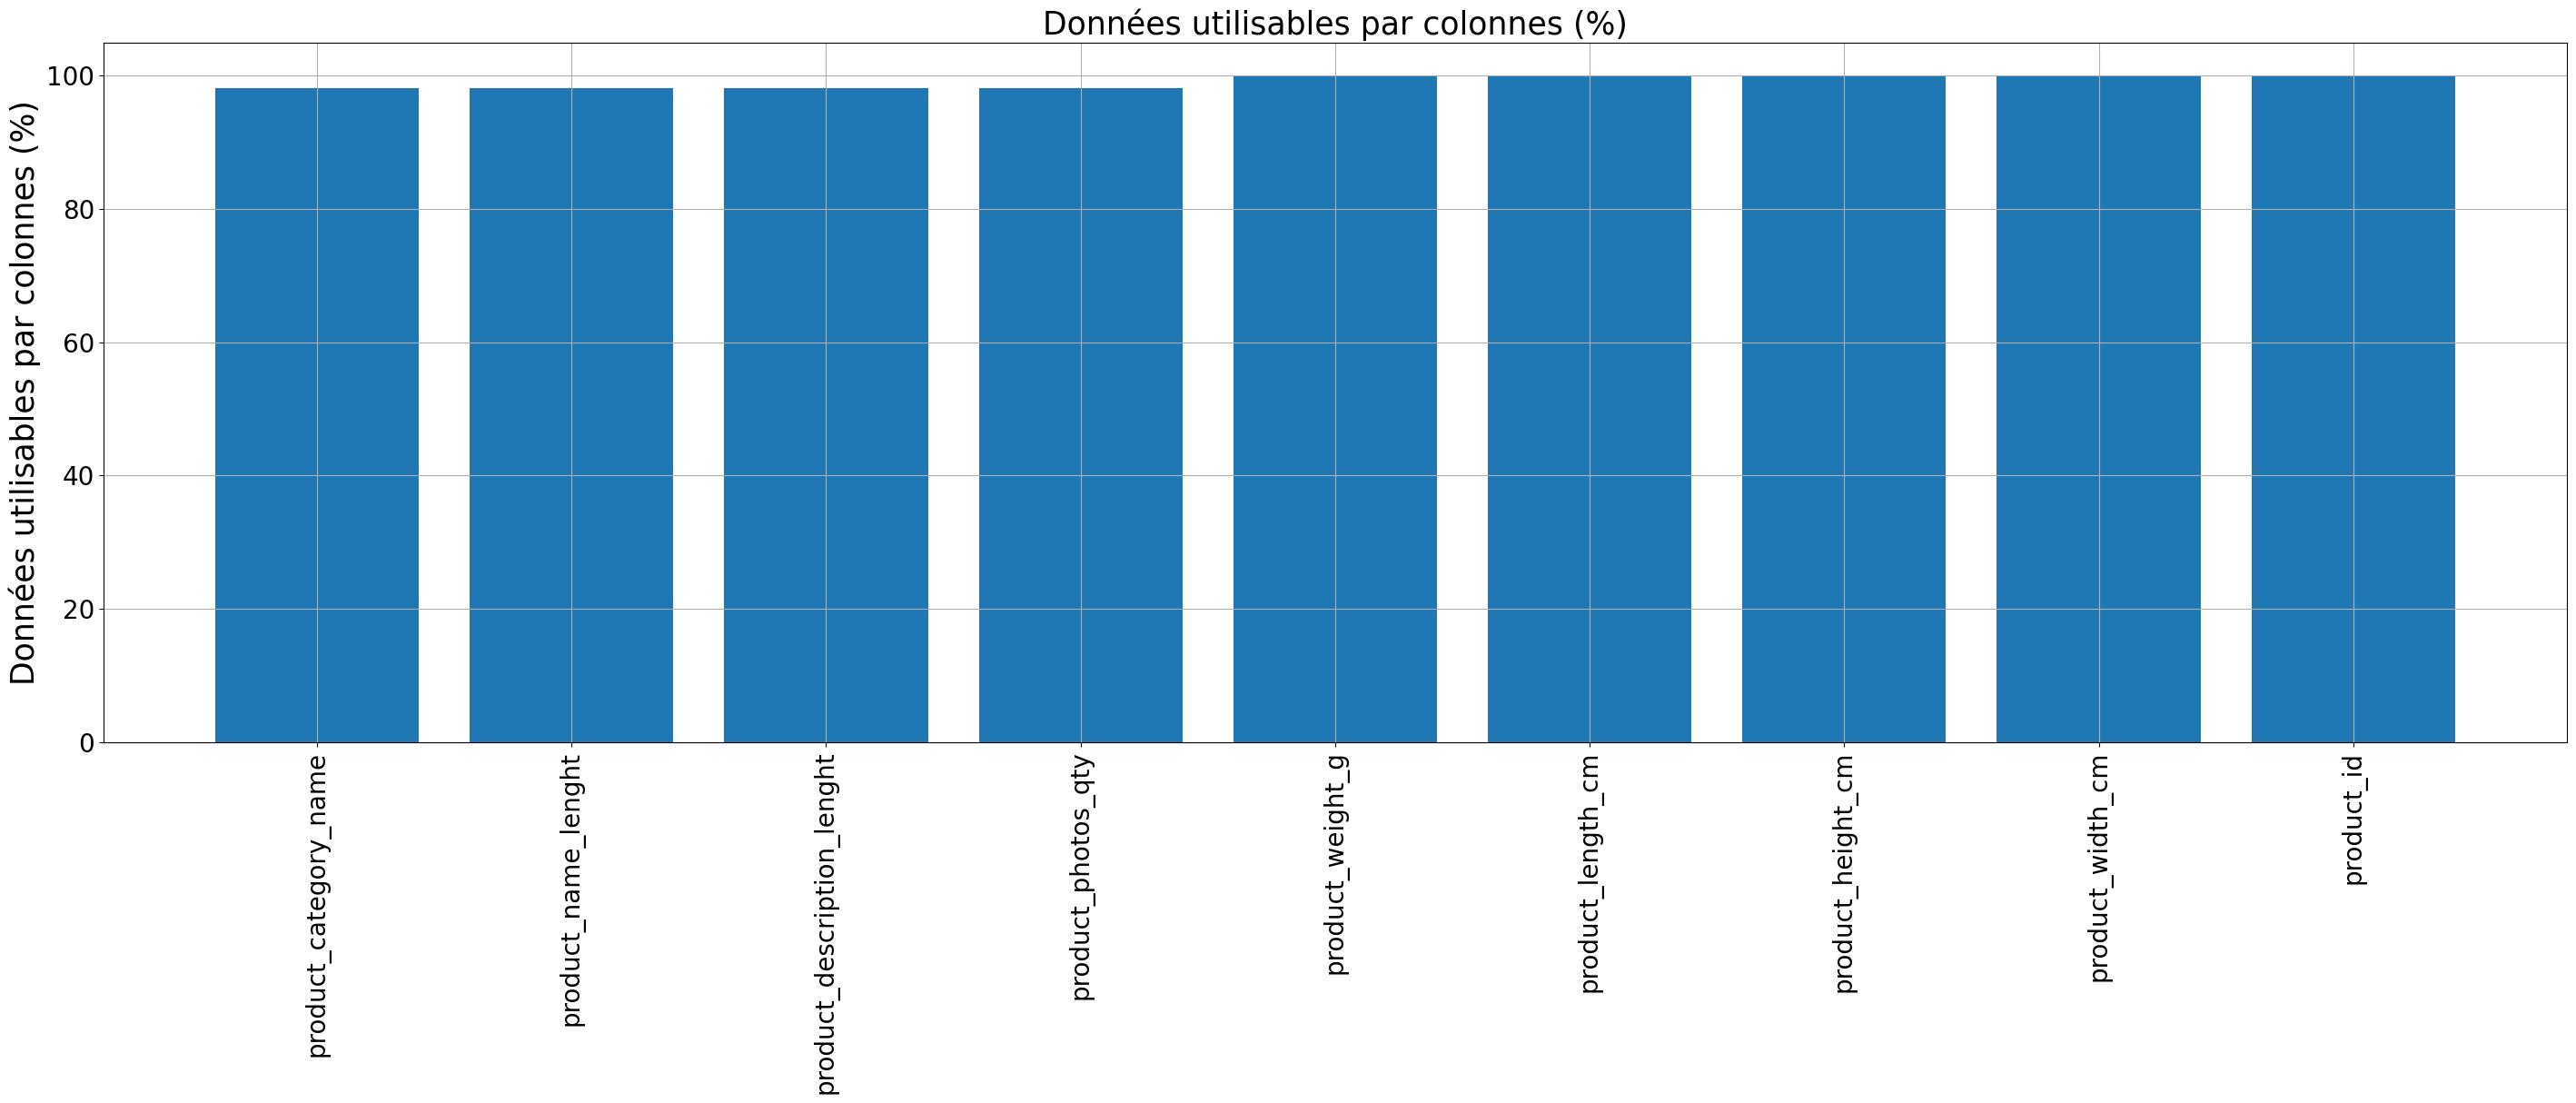

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [4]:
# lets watch column names, types and usable rates
Df_products = pd.read_csv('olist_products_dataset.csv').drop_duplicates()
print('Df_products')
print(Df_products.columns.values)
info_data_unique(Df_products)

#Some missing values :
plot_valeurs_utilisables(Df_products)

#Lets delete them
Df_products = Df_products.dropna()
Df_products.head()

#a bed :40Kg => Ok
Df_products[Df_products.product_weight_g>25000]

Df_products.describe()

In [5]:
Df_products.nunique()

product_id                    32340
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2202
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [6]:
# 2 catégories more than Df_catégorie
Df_products.nunique()
print(Df_products.product_category_name[~Df_products.product_category_name.isin(Df_category_name.product_category_name)].unique())

['pc_gamer' 'portateis_cozinha_e_preparadores_de_alimentos']


Df_orders
['order_id' 'customer_id' 'order_status' 'order_purchase_timestamp'
 'order_approved_at' 'order_delivered_carrier_date'
 'order_delivered_customer_date' 'order_estimated_delivery_date']
les colonnes sont de types :   [dtype('O')]
  
il y a : 99441 lignes, 8 colonnes
  
il y a : 99.4 % de valeurs utilisables


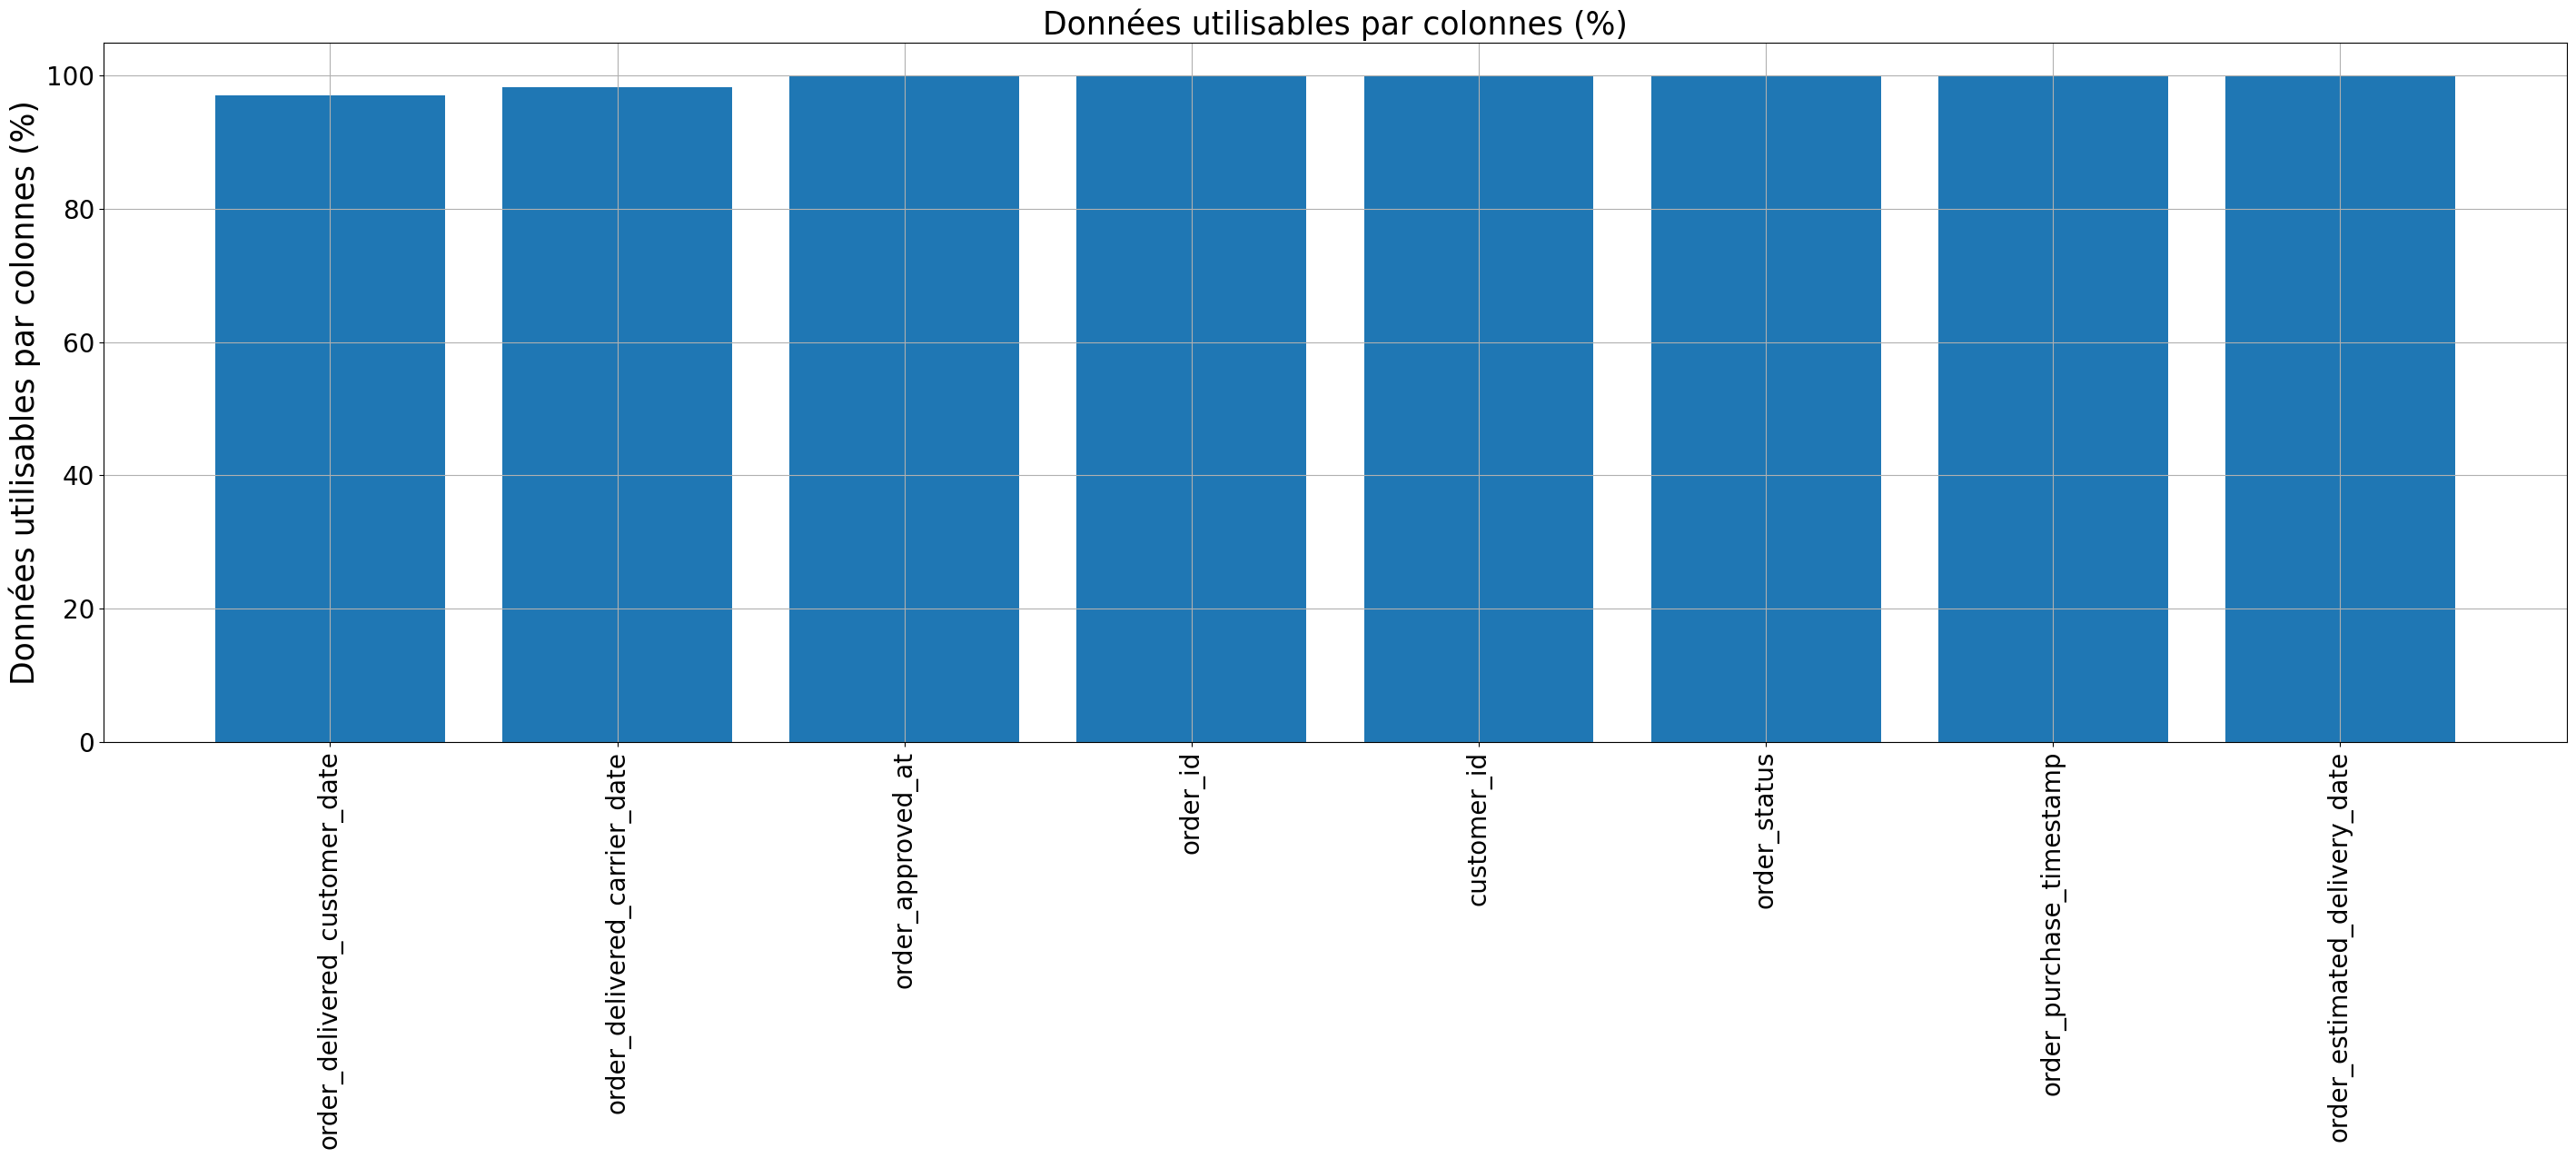

different types of order_status : ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


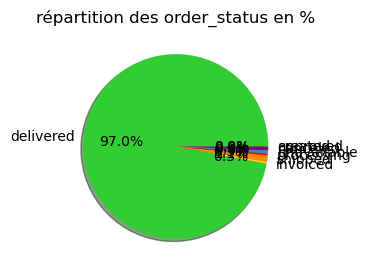

In [7]:
# lets watch column names, types and usable rates
Df_orders = pd.read_csv('olist_orders_dataset.csv').drop_duplicates()
print('Df_orders')

print(Df_orders.columns.values)
info_data_unique(Df_orders)


plot_valeurs_utilisables(Df_orders)

print("different types of order_status :",Df_orders.order_status.unique())
colors=["limegreen","gold", "darkorange", "red","steelblue","purple","black","grey","pink"]

#Vérifions la répartition 
Df_reparti_grade=pd.DataFrame()
fig=plt.figure(figsize=(3,3))
for status in Df_orders.order_status.unique() :
    Df_reparti_grade[status] = [len(Df_orders[Df_orders['order_status']==status])/len(Df_orders)*100]
    
Df_reparti_grade =Df_reparti_grade.T
plt.pie(Df_reparti_grade[0], labels=Df_reparti_grade.index, autopct='%1.1f%%', shadow=True,colors = colors)
plt.title("répartition des order_status en %")
plt.show()



Df_orders[Df_orders.order_id=='03caa2c082116e1d31e67e9ae3700499']
#order_delivered_carrier_date :  date de livraison transporteur

Df_orders = Df_orders[Df_orders['order_status']=='delivered']


In [8]:
#Let's modify type do datetime for concerned columns
col_to_date= ['order_estimated_delivery_date','order_estimated_delivery_date',"order_purchase_timestamp"]

for col in col_to_date :
    Df_orders=time_to_datetime(Df_orders,col)

Df_order_reviews
['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']
les colonnes sont de types :   [dtype('O') dtype('int64')]
  
il y a : 99224 lignes, 7 colonnes
  
il y a : 79.0 % de valeurs utilisables
 
4 --- recomendo
5 --- Super recomendo
1 --- Não chegou meu produto 
5 --- Ótimo
4 --- Muito bom.
5 --- Bom
5 --- Maravilhoso!
5 --- Entrega perfeita
5 --- MT lindo
5 --- Ótimo Produto! 
5 --- RECOMENDO SEMPRE!!
5 --- ***** Recomendo
5 --- OTIMO
3 --- Entrega atrasou
5 --- muito boa
4 ---  4 
1 --- Médio
5 --- prazo entrega
5 --- Super produto 
1 --- falta de produto e quebra


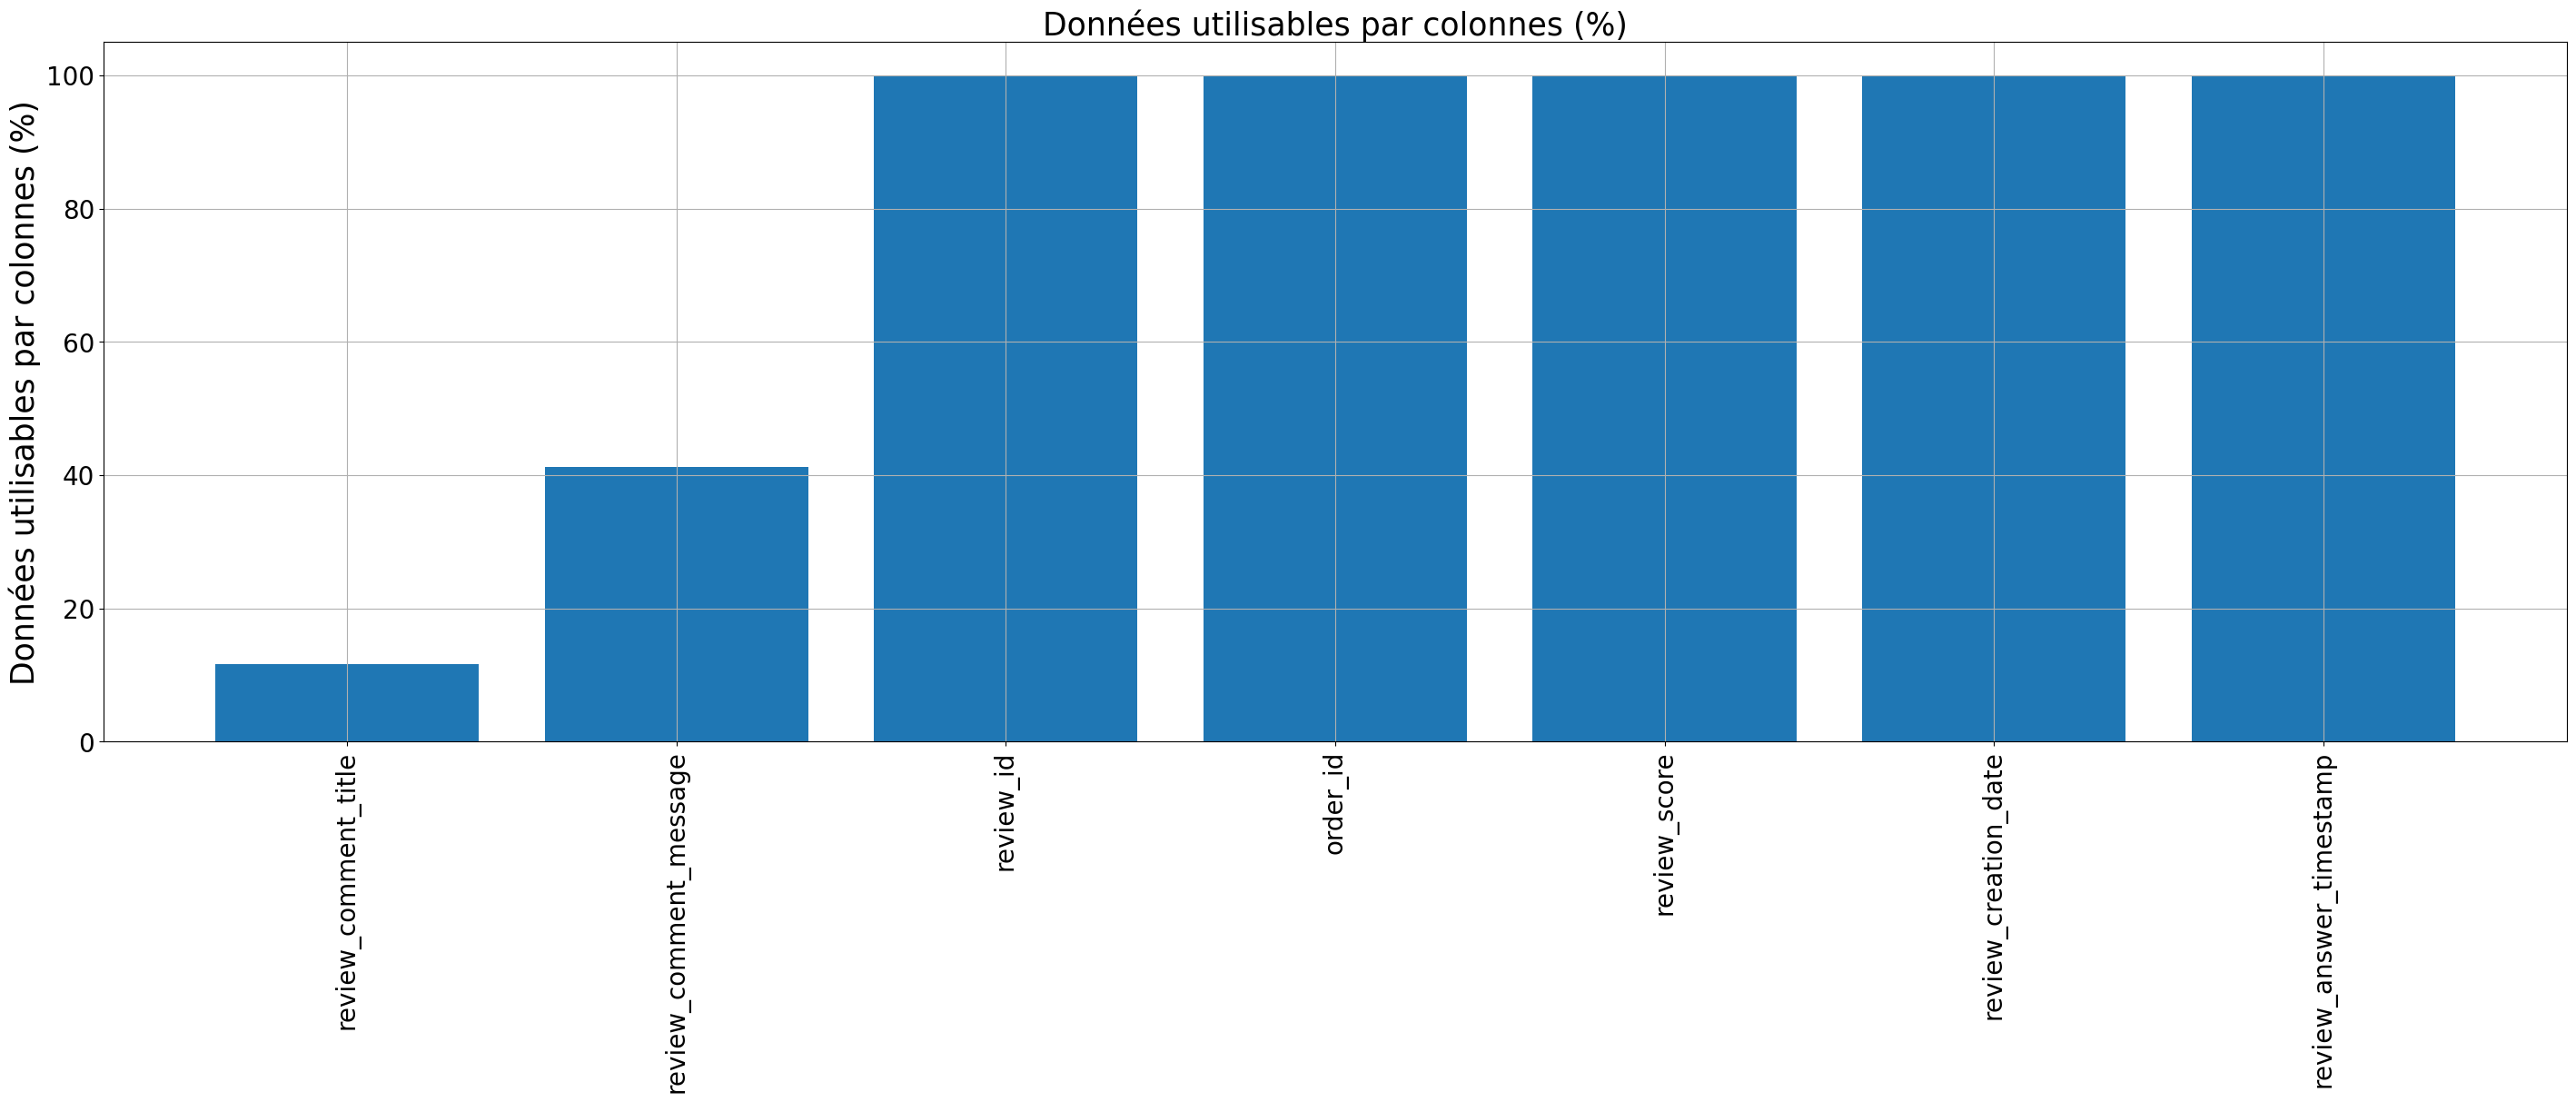

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
29745,211fa81a22870cc634265ea85b751e40,03caa2c082116e1d31e67e9ae3700499,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39


In [9]:
# lets watch column names, types and usable rates
Df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv').drop_duplicates()
print('Df_order_reviews')
print(Df_order_reviews.columns.values)
info_data_unique(Df_order_reviews)
Df_order_reviews.describe()

print(' ')
Df_order_reviews_dropna= Df_order_reviews.dropna()
for score, title in zip(Df_order_reviews_dropna['review_score'][0:20],Df_order_reviews_dropna['review_comment_title'][0:20]) :
    print(score,"---",title)
    
#0 = verry unhappy
#5 = verry happy

plot_valeurs_utilisables(Df_order_reviews)

#Un payement of 13000 with score of 1 : not cool
Df_order_reviews[Df_order_reviews.order_id=='03caa2c082116e1d31e67e9ae3700499']


In [10]:
# lets watch column names, types and usable rates
Df_payements = pd.read_csv('olist_order_payments_dataset.csv').drop_duplicates()
print('Df_payements')

print(Df_payements.columns.values)
info_data_unique(Df_payements)

#payements in 20 times are made with vouchers
Df_payements[Df_payements.payment_sequential>20].sort_values(by='order_id')

Df_payements[Df_payements.payment_value>800].sort_values(by='order_id')

#a payement of 6000 in Bank note : weird

Df_payements.describe()

#some payements equals 0
Df_payements[Df_payements.payment_value==0]
Df_payements[Df_payements.order_id=='8bcbe01d44d147f901cd3192671144db']



Df_payements
['order_id' 'payment_sequential' 'payment_type' 'payment_installments'
 'payment_value']
les colonnes sont de types :   [dtype('O') dtype('int64') dtype('float64')]
  
il y a : 103886 lignes, 5 colonnes
  
il y a : 100.0 % de valeurs utilisables


,order_id,payment_sequential,payment_type,payment_installments,payment_value
5163,8bcbe01d44d147f901cd3192671144db,3,voucher,1,6.25
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
20963,8bcbe01d44d147f901cd3192671144db,1,credit_card,1,36.21
63762,8bcbe01d44d147f901cd3192671144db,2,voucher,1,31.70


In [11]:
# lets watch column names, types and usable rates
Df_order_items = pd.read_csv('olist_order_items_dataset.csv').drop_duplicates()
print('Df_order_items')

print(Df_order_items.columns.values)
info_data_unique(Df_order_items)


Df_order_items[Df_order_items.freight_value>300]

#an order with multiple time the same article
Df_order_items[Df_order_items.order_id=='03caa2c082116e1d31e67e9ae3700499']

Df_order_items.describe()
Df_order_items[Df_order_items.order_item_id>18].sort_values(by='order_id')

Df_order_items[Df_order_items.order_id=='8bcbe01d44d147f901cd3192671144db']



Df_order_items
['order_id' 'order_item_id' 'product_id' 'seller_id' 'shipping_limit_date'
 'price' 'freight_value']
les colonnes sont de types :   [dtype('O') dtype('int64') dtype('float64')]
  
il y a : 112650 lignes, 7 colonnes
  
il y a : 100.0 % de valeurs utilisables


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
61321,8bcbe01d44d147f901cd3192671144db,1,85d4c1a46f08f730de651ea6f6645313,3d871de0142ce09b7081e2b9d1733cb1,2018-01-30 23:37:20,59.0,15.16


In [12]:
# lets watch column names, types and usable rates
Df_geo = pd.read_csv('olist_geolocation_dataset.csv').drop_duplicates(ignore_index=True)
print('Df_geo')
print(Df_geo.columns.values)
info_data_unique(Df_geo)
Df_geo.nunique()

Df_geo
['geolocation_zip_code_prefix' 'geolocation_lat' 'geolocation_lng'
 'geolocation_city' 'geolocation_state']
les colonnes sont de types :   [dtype('int64') dtype('float64') dtype('O')]
  
il y a : 738332 lignes, 5 colonnes
  
il y a : 100.0 % de valeurs utilisables


geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [13]:
# lets watch column names, types and usable rates
Df_customers = pd.read_csv('olist_customers_dataset.csv').drop_duplicates()
print('Df_customers')

print(Df_customers.columns.values)
info_data_unique(Df_customers)


Df_customers
['customer_id' 'customer_unique_id' 'customer_zip_code_prefix'
 'customer_city' 'customer_state']
les colonnes sont de types :   [dtype('O') dtype('int64')]
  
il y a : 99441 lignes, 5 colonnes
  
il y a : 100.0 % de valeurs utilisables


In [14]:
#Lets print all columns to merge Dfs
print('Df_category_name')
print(Df_category_name.columns.values)
print(' ')

print('Df_sellers')
print(Df_sellers.columns.values)

print(' ')

print('Df_products')
print(Df_products.columns.values)

print(' ')

print('Df_orders')
print(Df_orders.columns.values)

print(' ')

print('Df_order_reviews')
print(Df_order_reviews.columns.values)

print(' ')

print('Df_payements')
print(Df_payements.columns.values)

print(' ')

print('Df_order_items')
print(Df_order_items.columns.values)

print(' ')

print('Df_geo')
print(Df_geo.columns.values)
print(' ')


print('Df_customers')
print(Df_customers.columns.values)


Df_category_name
['product_category_name' 'product_category_name_english']
 
Df_sellers
['seller_id' 'seller_zip_code_prefix' 'seller_city' 'seller_state']
 
Df_products
['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']
 
Df_orders
['order_id' 'customer_id' 'order_status' 'order_purchase_timestamp'
 'order_approved_at' 'order_delivered_carrier_date'
 'order_delivered_customer_date' 'order_estimated_delivery_date']
 
Df_order_reviews
['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']
 
Df_payements
['order_id' 'payment_sequential' 'payment_type' 'payment_installments'
 'payment_value']
 
Df_order_items
['order_id' 'order_item_id' 'product_id' 'seller_id' 'shipping_limit_date'
 'price' 'freight_value']
 
Df_geo
['geolocation_zip_code_prefix' 'geolocation_lat' 'geo

In [15]:
#Lets merge Dfs
Df= pd.merge(pd.merge(pd.merge(pd.merge(Df_order_items,Df_orders),Df_sellers),Df_order_reviews),Df_payements)
                                       

In [16]:
Df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], dtype='object')

In [17]:
#Number of sells per seller 

Df_sellers['number_of_sales']=0
for seller in Df.seller_id.unique():
    Df_sellers.number_of_sales.loc[Df_sellers.seller_id==seller] = Df.order_id.loc[Df.seller_id==seller].nunique()

C:\Users\33646\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


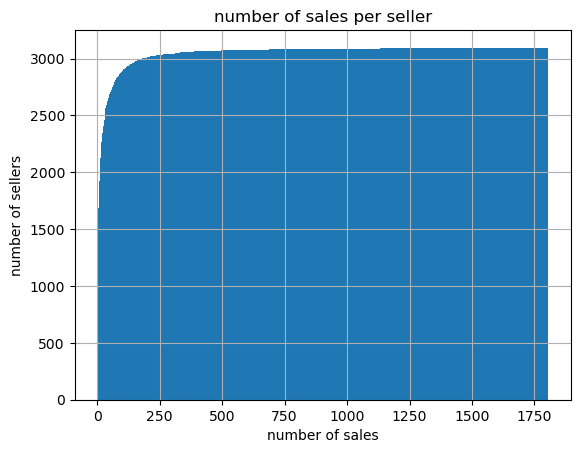

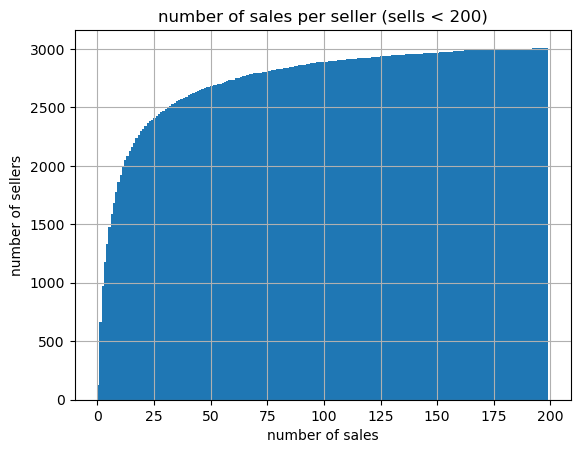

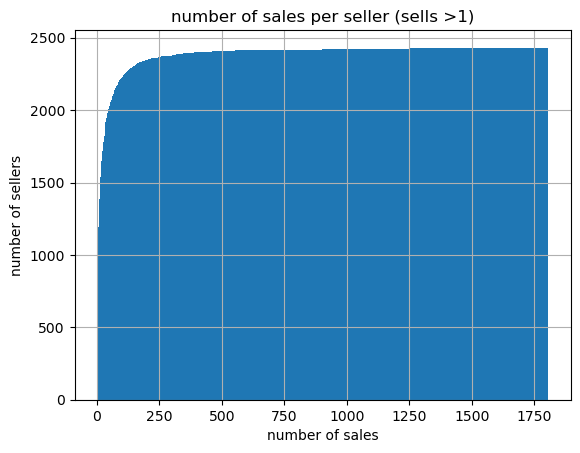

In [18]:
#Number of sells per seller repartition
hist_of_sales= Df_sellers[["seller_id","number_of_sales"]].drop_duplicates().iloc[:,1]
plt.hist(hist_of_sales,bins=500,cumulative=True)
plt.title('number of sales per seller')
plt.xlabel('number of sales')
plt.ylabel('number of sellers')
plt.grid()
plt.show()

hist_of_sales= Df_sellers[["seller_id","number_of_sales"]].drop_duplicates()\
                .iloc[:,1][Df_sellers[["seller_id","number_of_sales"]].drop_duplicates().iloc[:,1]<200]
plt.hist(hist_of_sales,bins=500,cumulative=True)
plt.title('number of sales per seller (sells < 200)')
plt.xlabel('number of sales')
plt.ylabel('number of sellers')
plt.grid()
plt.show()

hist_of_sales= Df_sellers[["seller_id","number_of_sales"]].drop_duplicates()\
                .iloc[:,1][Df_sellers[["seller_id","number_of_sales"]].drop_duplicates().iloc[:,1]>1]
plt.hist(hist_of_sales,bins=500,cumulative=True)
plt.title('number of sales per seller (sells >1)')
plt.xlabel('number of sales')
plt.ylabel('number of sellers')
plt.grid()
plt.show()

In [19]:
#Lets add the sum of price order per seller
Df_sellers['sum_price']= 0
Dfgroupby= Df[["price","seller_id"]].groupby('seller_id').sum()

for seller in Df.seller_id.unique():
    Df_sellers.sum_price.loc[Df_sellers.seller_id==seller]= Dfgroupby.loc[seller]["price"]
    


In [20]:
#Lets add the mean price per order pr seller

Df_sellers['mean_price']= 0
Dfgroupby= Df[["price","seller_id"]].groupby('seller_id').mean()

for seller in Df.seller_id.unique():
    Df_sellers.mean_price.loc[Df_sellers.seller_id==seller]= Dfgroupby.loc[seller]["price"]

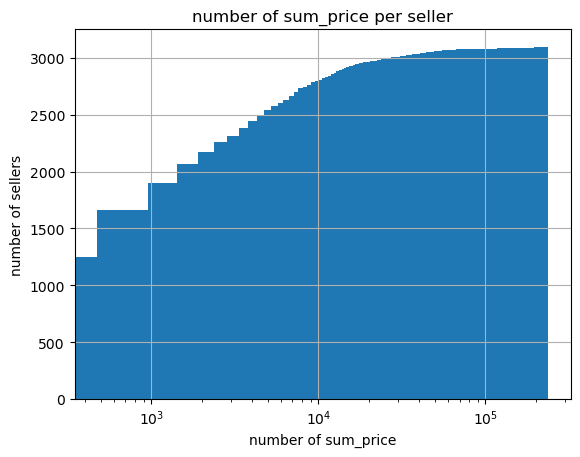

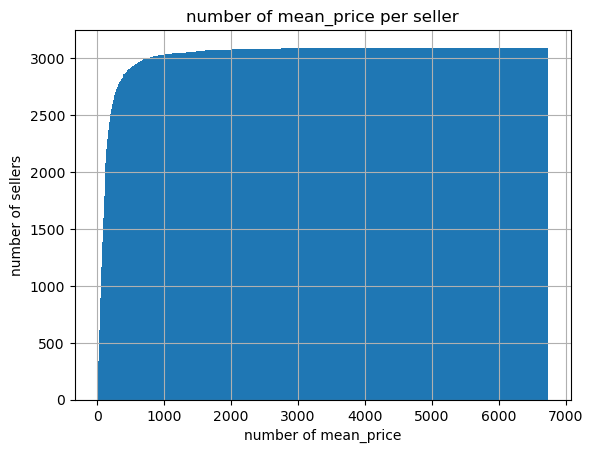

In [21]:
#sum_price repartition per vendeur
hist_of_sumprice= Df_sellers[["seller_id","sum_price"]].drop_duplicates().iloc[:,1]
plt.hist(hist_of_sumprice,bins=500,cumulative=True)
plt.title('number of sum_price per seller')
plt.xlabel('number of sum_price')
plt.ylabel('number of sellers')
plt.xscale('log')
plt.grid()
plt.show()

#mean_price repartition per vendeur
hist_of_sumprice= Df_sellers[["seller_id","mean_price"]].drop_duplicates().iloc[:,1]
plt.hist(hist_of_sumprice,bins=500,cumulative=True)
plt.title('number of mean_price per seller')
plt.xlabel('number of mean_price')
plt.ylabel('number of sellers')
#plt.xscale('log')
plt.grid()
plt.show()

In [22]:
#Lets add the mean_review_score per seller
Df_sellers['mean_review_score']= 0
Dfgroupby= Df[["seller_id","review_score"]].groupby('seller_id').mean()

for seller in Df.seller_id.unique():
    Df_sellers['mean_review_score'].loc[Df_sellers.seller_id==seller]= Dfgroupby.loc[seller]["review_score"]
    
print(len(Df_sellers)  )
Df_sellers  = Df_sellers[Df_sellers.mean_review_score>0]
print(len(Df_sellers)  )


3095
2965


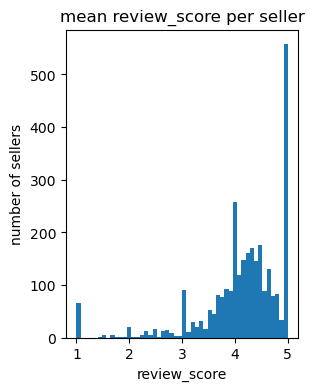

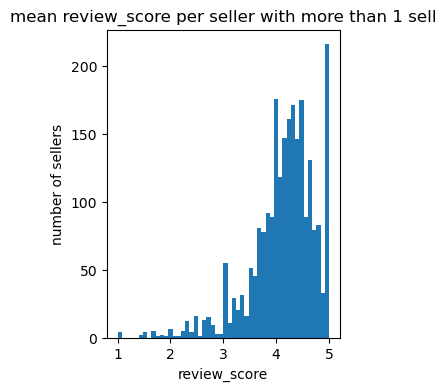

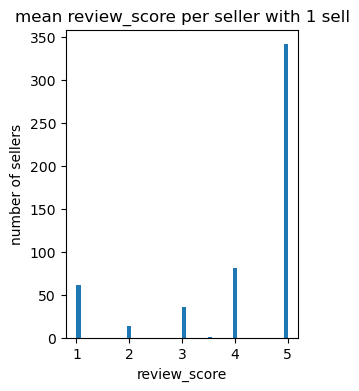

In [23]:
#review_score répartition per seller
review_score_hist = Df_sellers['mean_review_score']

fig=plt.figure(figsize=(3,4))
plt.hist(review_score_hist,bins=50)
plt.title('mean review_score per seller')
plt.xlabel('review_score')
plt.ylabel('number of sellers')
plt.show()

#review_score répartition per seller (with more then 1 sell)
multi_order_review_score_hist = Df_sellers['mean_review_score'][Df_sellers.number_of_sales>1]

fig=plt.figure(figsize=(3,4))
plt.hist(multi_order_review_score_hist,bins=50)
plt.title('mean review_score per seller with more than 1 sell')
plt.xlabel('review_score')
plt.ylabel('number of sellers')
plt.show()

#review_score répartition per seller (with 1 sell)
multi_order_review_score_hist = Df_sellers['mean_review_score'][Df_sellers.number_of_sales==1]

fig=plt.figure(figsize=(3,4))
plt.hist(multi_order_review_score_hist,bins=50)
plt.title('mean review_score per seller with 1 sell')
plt.xlabel('review_score')
plt.ylabel('number of sellers')
plt.show()

In [24]:
#number of clients per seller 

Df_sellers['number_of_clients']=0

for seller in Df.seller_id.unique():
    Df_sellers.number_of_clients.loc[Df_sellers.seller_id==seller] = Df.customer_id.loc[Df.seller_id==seller].nunique()

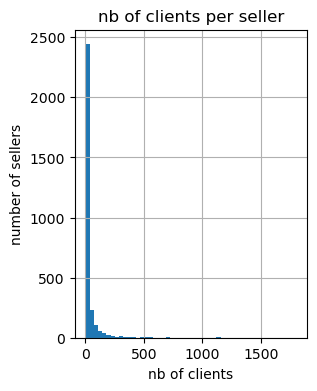

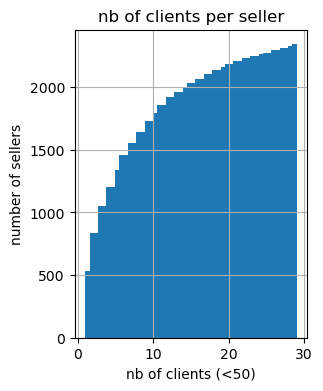

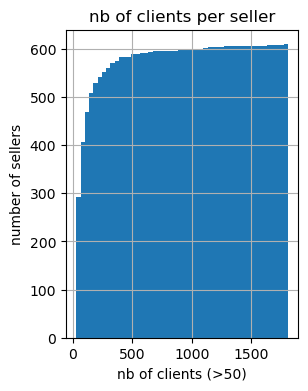

In [25]:
#number_of_clients repartition per seller
review_client_hist = Df_sellers[["seller_id","number_of_clients"]].groupby(by='seller_id').mean()

fig=plt.figure(figsize=(3,4))
plt.hist(review_client_hist,bins=50)
plt.title('nb of clients per seller')
plt.xlabel('nb of clients')
plt.ylabel('number of sellers')
plt.grid()
plt.show()

#number_of_clients (<50) repartition per seller 
review_client_hist_inf = review_client_hist[review_client_hist['number_of_clients']<30]

fig=plt.figure(figsize=(3,4))
plt.hist(review_client_hist_inf,bins=50,cumulative=True)
plt.title('nb of clients per seller')
plt.xlabel('nb of clients (<50)')
plt.ylabel('number of sellers')
plt.grid()

plt.show()

#number_of_clients (>50) repartition per seller
review_client_hist_sup = review_client_hist[review_client_hist['number_of_clients']>30]

fig=plt.figure(figsize=(3,4))
plt.hist(review_client_hist_sup,bins=50,cumulative=True)
plt.title('nb of clients per seller')
plt.xlabel('nb of clients (>50)')
plt.ylabel('number of sellers')
plt.grid()
plt.show()

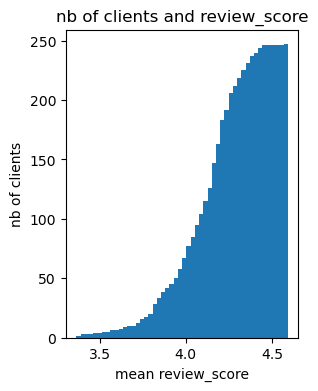

In [26]:
#number_of_clients vs nb of clients repartition
review_client_hist = Df_sellers[["mean_review_score","number_of_clients"]].groupby('number_of_clients').mean()

fig=plt.figure(figsize=(3,4))
plt.hist(review_client_hist,bins=50,cumulative=True)
plt.title('nb of clients and review_score')
plt.ylabel('nb of clients')
plt.xlabel('mean review_score')
plt.show()

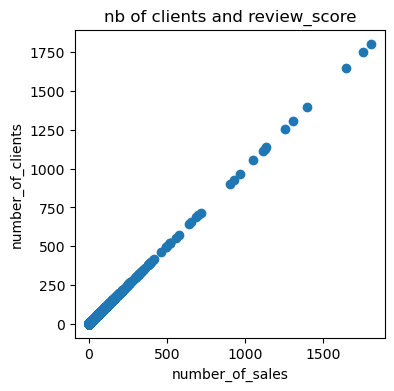

In [27]:
#number_of_clients vs nb of sells

fig=plt.figure(figsize=(4,4))
plt.scatter(Df_sellers["number_of_clients"], Df_sellers["number_of_sales"])
plt.title('nb of clients and review_score')
plt.ylabel('number_of_clients')
plt.xlabel('number_of_sales')
plt.show()

#Its 100% correlated. Lets delete one of them

In [28]:
Df= pd.merge(Df,Df_products)

In [29]:
#number_of_categories repartition per seller 

Df_sellers['number_of_categories'] =0 

for seller in Df.seller_id.unique():
    Df_sellers['number_of_categories'].loc[Df_sellers.seller_id==seller] = Df.product_category_name.loc[Df.seller_id==seller].nunique()



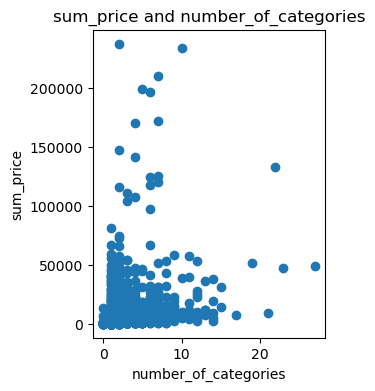

In [30]:
#sum price vs nb nb of catégories repartition

fig=plt.figure(figsize=(3,4))
plt.scatter(Df_sellers["number_of_categories"],Df_sellers["sum_price"])
plt.title('sum_price and number_of_categories')
plt.ylabel('sum_price')
plt.xlabel('number_of_categories')
plt.show()

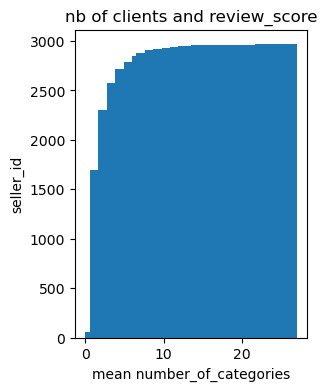

In [31]:
#nb of clients vs review_score reparition
review_client_hist=Df_sellers[["seller_id","number_of_categories"]].groupby(by='seller_id').sum()

fig=plt.figure(figsize=(3,4))
plt.hist(review_client_hist,bins=50,cumulative=True)
plt.title('nb of clients and review_score')
plt.ylabel('seller_id')
plt.xlabel('mean number_of_categories')
plt.show()

In [32]:
#Replace order_delivered_customer_date == Na by order_delivered_carrier_date
Df_orders.order_delivered_customer_date[Df_orders['order_delivered_customer_date'].isna()] = \
    Df_orders.order_delivered_carrier_date[Df_orders['order_delivered_customer_date'].isna()]

#Lets calculate the estimated and real delivery time in days
End = pd.to_datetime(Df_orders['order_delivered_customer_date'])
Start  = pd.to_datetime(Df_orders['order_purchase_timestamp'])
Df_orders['real_deliv_time(days)'] = End.subtract(Start)/ np.timedelta64(1, 'D')
Df_orders = Df_orders.dropna()

C:\Users\33646\AppData\Local\Temp/ipykernel_13140/2430964642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_orders.order_delivered_customer_date[Df_orders['order_delivered_customer_date'].isna()] = \


In [33]:
End = pd.to_datetime(Df_orders['order_estimated_delivery_date'])
Start = pd.to_datetime(Df_orders['order_purchase_timestamp'])
Df_orders['estim_deliv_time(days)'] = End.subtract(Start)/ np.timedelta64(1, 'D')


In [34]:
#Lets calculate the difference between expected and real delivery time in days

Df_orders['real_minus_estim(days)'] = (Df_orders['real_deliv_time(days)'] - Df_orders['estim_deliv_time(days)'])
#Negative means fatser than expected


In [ ]:
#Lets calculate the distance Haversine from geo loc to Sao  paulo center 
from haversine import haversine, Unit

Sao_Paulo_center = [-23.533773,-46.625290]
Df_geo['_seller_distance_to_sao_paulo']= 0

for index in range(len(Df_geo)):
    cordonnees = [Df_geo.geolocation_lat.loc[index],Df_geo.geolocation_lng.loc[index]]
    Df_geo['_seller_distance_to_sao_paulo'].loc[index]= haversine(cordonnees,Sao_Paulo_center)


C:\Users\33646\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
Df_geo.rename(columns={'geolocation_zip_code_prefix': 'seller_zip_code_prefix'}, inplace=True)

In [ ]:
#Lets keep one  _seller_distance_to_sao_paulo per Zip code : lets mean it
for zip_code in Df_geo.seller_zip_code_prefix[Df_geo.seller_zip_code_prefix.duplicated()].unique():
    Df_geo._seller_distance_to_sao_paulo.loc[Df_geo.seller_zip_code_prefix==zip_code] = Df_geo._seller_distance_to_sao_paulo.loc[Df_geo.seller_zip_code_prefix==zip_code].mean()
Df_geo = Df_geo.drop_duplicates()
    

In [ ]:
#Lets Renname city without accents to avoid dupplicates
import unidecode 
for city in Df_geo.geolocation_city.unique():

    Df_geo.geolocation_city.loc[Df_geo.geolocation_city==city] = unidecode.unidecode(city)
Df_geo= Df_geo.drop_duplicates('seller_zip_code_prefix')

In [ ]:
Df_geo.to_csv('Df_geo_final.csv')

In [ ]:
#Lets scatter the sellers geo loc
plt.scatter(Df_geo.iloc[:,2],Df_geo.iloc[:,1],s=.2)


In [ ]:
#We can see Brasil and some unlogical Dots 
#Lets delete them
Df_geo = Df_geo[Df_geo.iloc[:,1]<10]

In [ ]:
#Lets scatter the sellers geo loc
plt.scatter(Df_geo.iloc[:,2],Df_geo.iloc[:,1],s=.2)

In [ ]:
#Lets merge all the Df together
Df= pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(Df_order_items,
                                                                             Df_orders),
                                                                             Df_sellers),
                                                                             Df_order_reviews),
                                                                             Df_payements),
                                                                             Df_customers),
                                                                             Df_products),
                                                                             Df_geo).drop_duplicates()
#113216 rows

In [ ]:
#mean_weight repartition per seller 

Df["mean_weight"] = 0

for seller in Df.seller_id.unique():
    Df['mean_weight'].loc[Df.seller_id==seller] = Df.product_weight_g.loc[Df.seller_id==seller].mean()


In [ ]:
Df[Df.geolocation_state!=Df.seller_state]

In [ ]:
#nb of clients vs review_score reparition
Df_hist=Df[["mean_review_score","real_minus_estim(days)"]]

fig=plt.figure(figsize=(3,4))
plt.scatter(Df_hist.iloc[:,0],Df_hist.iloc[:,1])
plt.title('mean_review_score and real_minus_estim')
plt.xlabel('mean_review_score')
plt.ylabel('real_minus_estim')
plt.show()

In [ ]:
Df['number_of_product'] = 0
for seller in Df.seller_id.unique():
    Df['number_of_product'].loc[Df.seller_id==seller] = Df.product_id.loc[Df.seller_id==seller].nunique()

In [ ]:
#Lets obtains some ifnormation with groupby.sum
Df_group_by_sum = Df[["seller_id",'freight_value']].groupby(by='seller_id').sum()
Df_group_by_sum.columns = ["freight_value_sum"]
Df_group_by_sum=Df_group_by_sum.reset_index()

In [ ]:
#Lets obtains some ifnormation with groupby.mean
Liste= ["seller_id","order_item_id",'real_deliv_time(days)', 'estim_deliv_time(days)','real_minus_estim(days)','product_photos_qty']
Df_group_by_mean = Df[Liste].groupby(by='seller_id').mean()
Df_group_by_mean.columns=["number_item_mean",'real_deliv_time_mean', 'estim_deliv_time_mean','real_minus_estim_mean','product_photos_qty_mean']
Df_group_by_mean = Df_group_by_mean.reset_index()

In [ ]:
#Merge groupby.sum and groupby.mean
Df_group = pd.merge(Df_group_by_sum,Df_group_by_mean)

In [ ]:
#Lets merge groupby and Df
Df= pd.merge(Df,Df_group).drop_duplicates()

In [ ]:
#Df2 is the Df I will use to create the clusters
List_features = ['seller_id',   'seller_zip_code_prefix', 'number_of_sales', 'sum_price','mean_review_score',
                 'number_of_clients',  'number_of_categories',  '_seller_distance_to_sao_paulo',
                 'freight_value_sum', 'number_item_mean', 'real_deliv_time_mean', 'estim_deliv_time_mean',
                 'number_of_product','mean_price','mean_weight']
Df2=Df[List_features].drop_duplicates()

In [ ]:
#Lets renames colums to see better duing The CPA
cols_names= ['seller', 'seller_zip_code', 'nb_of_sales', 'sum_price', 'mean_rev_score', 'nb_of_clients', 'nb_of_cat', 
              'seller_distance_Sao_P', 'freight_sum', 'nb_item_mean', 'real_time_mean', 'estim_time_mean',
             'nb_of_product','mean_price','mean_weight']
Df2.columns = cols_names 
Df2.index=Df2.seller
Df2 = Df2.drop('seller',axis=1)

In [ ]:
Df2.dtypes

In [ ]:
#Lets replace object type by string type
Df2 = object_to_string(Df2)

In [ ]:
#Lets encode non numériques values
cols_to_encode = Df2.columns[(Df2.dtypes=='string')]

laben = preprocessing.LabelEncoder()


for encode in cols_to_encode :
    Df2[encode] = laben.fit_transform(Df2[encode])


In [ ]:
"""import seaborn  as sns
colors=["limegreen","gold", "darkorange", "red","steelblue"]#,"purple"]#,"black",
# Affichage des diagrammes de dispersion
sns.pairplot(Df2.sample(frac=.05),hue='mean_review_score')#, palette  = colors)
plt.show()"""

In [ ]:
# Calculate correlation between each pair of variable

corr_matrix=Df2.corr()
fig5 = plt.figure(figsize=(9,9))

# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
#mask[abs(corr_matrix)<.2] = True
#mask[corr_matrix==1] = True

# Draw the heatmap with the mask
sns.heatmap(round(corr_matrix,2), mask=mask,annot=True)
plt.show()

In [ ]:
#Lets plot histogramme of features I decided to keep
Data_hist = Df2[Df2.select_dtypes(include=['float64','int64']).columns]
X = Data_hist.values

X_len  = X.shape[1]
subplots = round(X_len/4) + 1

fig = plt.figure(figsize=(20, 15))

for feat_idx in range(X_len):

    ax = fig.add_subplot(subplots,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=300, color='steelblue', density=False, edgecolor='none')
    ax.set_title(Data_hist.columns[feat_idx], fontsize=10)
       
plt.tight_layout()
plt.show()

In [ ]:
Df2= pd.read_csv('Df2.csv')
Df2.index=Df2.seller
Df2 = Df2.drop('seller',axis=1)
Df2["freight_part"]= round(Df2.freight_sum/(Df2.freight_sum+Df2.sum_price),3)
Liste_to_delete = ['nb_of_clients']
Df2=Df2.drop(Liste_to_delete,axis=1)

In [ ]:
Df2.to_csv('Df2.csv')

In [ ]:
Df2.columns

In [ ]:
import datetime
_3_Months = (max(Df.order_purchase_timestamp)-datetime.timedelta(weeks = 12, days=5, hours = 6))
_6_Months = (max(Df.order_purchase_timestamp)-datetime.timedelta(weeks = 25, days=3,))
_12_Months = (max(Df.order_purchase_timestamp)-datetime.timedelta(weeks = 51))
_18_Months = (max(Df.order_purchase_timestamp)-datetime.timedelta(weeks = 76))
_18_Months

In [ ]:
Df=Df.drop_duplicates()

import time
time_to_datetime(Df,"order_purchase_timestamp")

Df['nb_sell_3m'] = 0
Df['nb_sell_6m'] = 0
Df['nb_sell_12m'] = 0
Df['nb_sell_18m'] = 0



for seller in Df.seller_id.unique():
    Df.nb_sell_3m.loc[(Df.seller_id==seller)&(Df.order_purchase_timestamp>_3_Months)] = \
    Df.order_id.loc[(Df.order_purchase_timestamp>_3_Months)&(Df.seller_id==seller)].nunique()
    
    Df.nb_sell_6m.loc[(Df.seller_id==seller)&(Df.order_purchase_timestamp>_6_Months)] = \
    Df.order_id.loc[(Df.order_purchase_timestamp>_6_Months)&(Df.seller_id==seller)].nunique()
        
    Df.nb_sell_12m.loc[(Df.seller_id==seller)&(Df.order_purchase_timestamp>_12_Months)] = \
    Df.order_id.loc[(Df.order_purchase_timestamp>_12_Months)&(Df.seller_id==seller)].nunique()
        
    Df.nb_sell_18m.loc[(Df.seller_id==seller)&(Df.order_purchase_timestamp>_18_Months)] = \
    Df.order_id.loc[(Df.order_purchase_timestamp>_18_Months)&(Df.seller_id==seller)].nunique()
    


In [ ]:
#Lets add the mean_review_score per seller

Df['mean_rev_score_3m'] = 0
Df['mean_rev_score_6m'] = 0
Df['mean_rev_score_12m'] = 0
Df['mean_rev_score_18m'] = 0


Dfgroupby= Df[["seller_id","review_score"]][Df.order_purchase_timestamp>_3_Months].groupby('seller_id').mean()

for seller in Df.seller_id[Df.order_purchase_timestamp>_3_Months].unique():
    Df['mean_rev_score_3m'].loc[Df.seller_id==seller]= Dfgroupby.loc[seller]["review_score"]


    
Dfgroupby= Df[["seller_id","review_score"]][Df.order_purchase_timestamp>_6_Months].groupby('seller_id').mean()

for seller in Df.seller_id[Df.order_purchase_timestamp>_6_Months].unique():
    Df['mean_rev_score_6m'].loc[Df.seller_id==seller]= Dfgroupby.loc[seller]["review_score"]

    
    
Dfgroupby= Df[["seller_id","review_score"]][Df.order_purchase_timestamp>_12_Months].groupby('seller_id').mean()

for seller in Df.seller_id[Df.order_purchase_timestamp>_12_Months].unique():
    Df['mean_rev_score_12m'].loc[Df.seller_id==seller]= Dfgroupby.loc[seller]["review_score"]


    
Dfgroupby= Df[["seller_id","review_score"]][Df.order_purchase_timestamp>_18_Months].groupby('seller_id').mean()

for seller in Df.seller_id[Df.order_purchase_timestamp>_18_Months].unique():
    Df['mean_rev_score_18m'].loc[Df.seller_id==seller]= Dfgroupby.loc[seller]["review_score"]
        

In [ ]:
Df = Df.sort_values(by = 'nb_sell_3m', ascending= False).drop_duplicates('seller_id', keep='first',ignore_index=True)

In [ ]:
#Save the Df to earn time next time
Df.to_csv('Df_final.csv',index=False)

In [ ]:
Df